In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [160]:
df = pd.read_csv("Index2018.csv")
df_copied = df.copy()

In [161]:
df_copied.head()

date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26

In [162]:
df_copied.describe()

spx           dax         ftse        nikkei
count  6269.000000   6269.000000  6269.000000   6269.000000
mean   1288.127542   6080.063363  5422.713545  14597.055700
std     487.586473   2754.361032  1145.572428   4043.122953
min     438.920000   1911.700000  2876.600000   7054.980000
25%     990.671905   4069.350000  4486.100000  10709.290000
50%    1233.420000   5773.340000  5662.430000  15028.170000
75%    1459.987747   7443.070000  6304.250000  17860.470000
max    2872.867839  13559.600000  7778.637689  24124.150000

In [163]:
df_copied.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Text(0.5, 1.0, 'S&P 500')

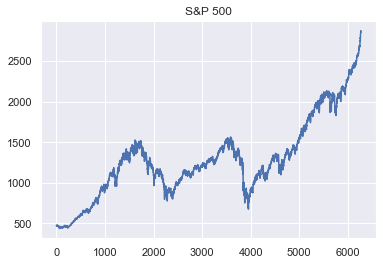

In [164]:
plt.plot(df_copied.spx)
plt.title("S&P 500")

Text(0.5, 1.0, 'FTSE 100 Prices')

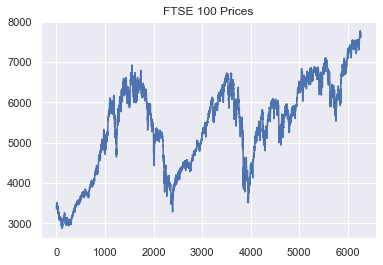

In [165]:
plt.plot(df_copied.ftse)
plt.title("FTSE 100 Prices")

In [166]:
import scipy.stats
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.460561028412, 1288.1275420815123, 0.9767273150948816))

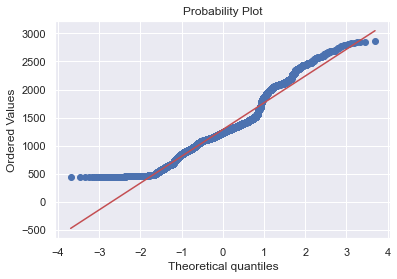

In [167]:
scipy.stats.probplot(df_copied.spx,plot=pylab)

In [168]:
#convert text to date_time,dayfirst sets the format to dd/mm/yyyy instead of mm/dd/yyyy
df_copied.date = pd.to_datetime(df_copied.date,dayfirst=True)


In [169]:
df_copied.date.describe( )

<ipython-input-169-0dcc88ae2d41>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copied.date.describe( )


count                    6269
unique                   6269
top       1999-11-12 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [170]:
df_copied.set_index("date",inplace=True)

In [171]:
#set the frquency,use asfreq to set frequency of the period,"d" to set the frequency for days and "b" to ensure no weekends
df_copied = df_copied.asfreq("b")

In [172]:
df_copied.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

In [173]:
df_copied.isna()

spx    dax   ftse  nikkei
date                                   
1994-01-07  False  False  False   False
1994-01-10  False  False  False   False
1994-01-11  False  False  False   False
1994-01-12  False  False  False   False
1994-01-13  False  False  False   False
...           ...    ...    ...     ...
2018-01-23  False  False  False   False
2018-01-24  False  False  False   False
2018-01-25  False  False  False   False
2018-01-26  False  False  False   False
2018-01-29  False  False  False   False

[6277 rows x 4 columns]

In [174]:
df_copied.spx = df_copied.spx.fillna(method="ffill")
df_copied.ftse = df_copied.ftse.fillna(method="bfill")
df_copied.dax = df_copied.fillna(value=df_copied.dax.mean())
df_copied.nikkei = df_copied.fillna(value=df_copied.nikkei.mean())

In [175]:
df_copied.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [176]:
#handling supplemnetary data,handle for only S and P
df_copied['market_value'] = df_copied.spx

In [177]:
del df_copied['spx']
del df_copied['dax']
del df_copied['ftse']
del df_copied['nikkei']

In [178]:
#SPLITTIING THE DATA
size = int(len(df_copied))

In [179]:
df = df_copied.iloc[:size]
df_test = df_copied.iloc[size:]

In [180]:
#WHITE NOISE,generating white noise value,has to be a normal distributiin but have the same mean and standard deviation
wn = np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df))

In [181]:
df['wn'] = wn

<ipython-input-181-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


Text(0.5, 1.0, 'White noise time series')

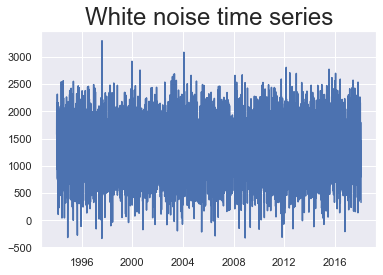

In [182]:
plt.plot(df.wn)
plt.title("White noise time series",size = 24)

Text(0.5, 1.0, 'S and P')

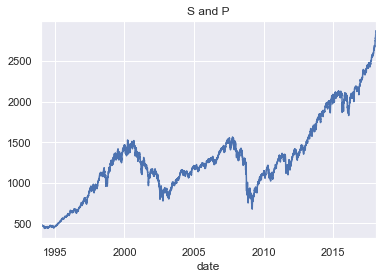

In [183]:
df.market_value.plot()
plt.title("S and P")

In [184]:
#RANDOM WALK
rw =pd.read_csv("025 RandWalk.csv")
rw.date = pd.to_datetime(rw.date,dayfirst= True)
rw.set_index("date",inplace=True)
rw = rw.asfreq("b")

In [185]:
df["rw"] = rw.price
df.head()

<ipython-input-185-2d8528016b4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rw"] = rw.price


market_value           wn           rw
date                                              
1994-01-07        469.90  1574.125732  1122.139662
1994-01-10        475.27  2153.135110  1080.347860
1994-01-11        474.13  1673.273839  1082.095245
1994-01-12        474.17  1073.826642  1083.639265
1994-01-13        472.47  1072.655001  1067.146255

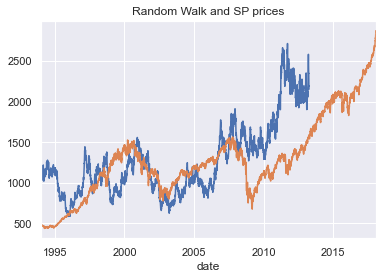

In [186]:
df.rw.plot()
df.market_value.plot()
plt.title("Random Walk and SP prices")
plt.legend
plt.show()

In [187]:
#stationarity
import statsmodels.tsa.stattools as sts

In [188]:
sts.adfuller(df.market_value)#third line number of lags used in regression(some auto correlation ),4th line number of observation used in the analysis,the last line estimate maximized information criteria provoded there is some apparent correlation,the lower the value the easier it is to make predictions for the future

(1.1194986381728411,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [189]:
sts.adfuller(df.wn)

(-41.407629766603,
 0.0,
 3,
 6273,
 {'1%': -3.4313928786754726,
  '5%': -2.8620008601902893,
  '10%': -2.5670153128952853},
 94987.23157329514)

In [192]:
#SEASONALITY
from statsmodels.tsa.seasonal import seasonal_decompose

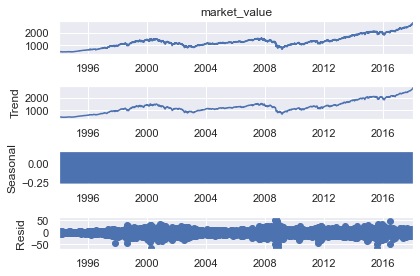

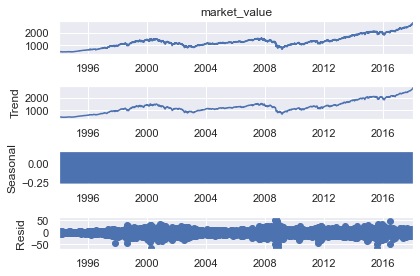

In [193]:
s_dec_additive = seasonal_decompose(df.market_value,model="additive")
s_dec_additive.plot()

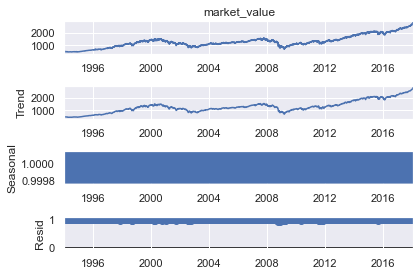

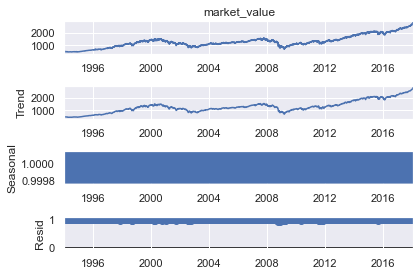

In [194]:
s_dec_mult = seasonal_decompose(df.market_value,model="multiplicative")
s_dec_mult.plot()

In [196]:
#ACF
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'Auto-Correlation Function')

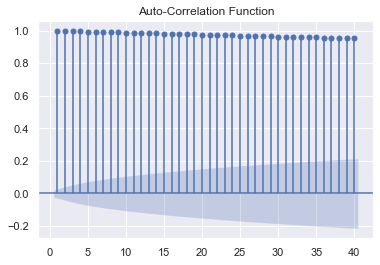

In [197]:
sgt.plot_acf(df.market_value,lags=40,zero=False)#Lags arguement sets the number of time periosds before the current one you want to use for analysis
plt.title("Auto-Correlation Function")

D:\PROGRAMMING\anaconda\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Auto-Correlation for Random Walk')

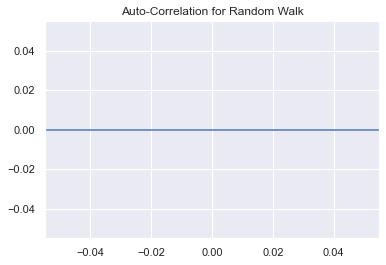

In [198]:
sgt.plot_acf(df.rw,lags=40,zero=False)
plt.title("Auto-Correlation for Random Walk")

Text(0.5, 1.0, 'PACF S&P')

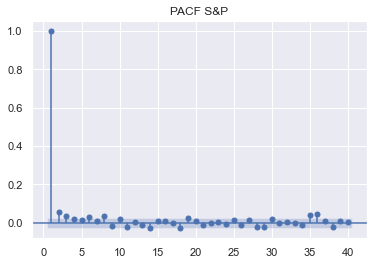

In [199]:
sgt.plot_pacf(df.market_value,lags=40,zero=False,method="ols")
plt.title("PACF S&P")

D:\PROGRAMMING\anaconda\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'PACF RW')

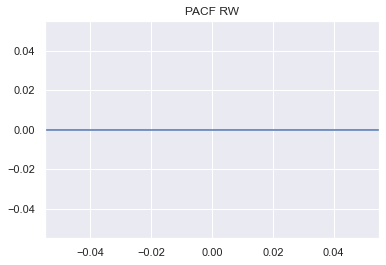

In [201]:
sgt.plot_pacf(df.rw,lags=40,zero=False)
plt.title("PACF RW")

AttributeError: 'DataFrame' object has no attribute 'ftse'